# SALES ANALYSIS

### Import necessary libraries

In [ ]:
import pandas as pd 
import os
import matplotlib.pyplot as plt

### Merge data from each month into one CSV

In [3]:
folder_path = 'C:/salesdata'
file_list = os.listdir(folder_path)

In [4]:
dfs = []
for file_name in file_list:
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        dfs.append(df)

In [5]:
df1 = pd.concat(dfs, ignore_index=True)

In [6]:
df1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


# DATA CLEANING 

### CHECKING NULLS 

In [12]:
df1.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
df1.dropna(inplace = True)

### CHECKING DUPLICATES ROWS

In [9]:
df1.duplicated().sum()

618

In [10]:
df1.drop_duplicates(inplace = True)

In [11]:
df1.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,185687,185687,185687,185687,185687,185687
unique,178438,20,10,24,142396,140788
top,160873,USB-C Charging Cable,1,11.95,12/15/19 20:16,"193 Forest St, San Francisco, CA 94016"
freq,5,21859,168291,21859,8,9


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185687 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185687 non-null  object
 1   Product           185687 non-null  object
 2   Quantity Ordered  185687 non-null  object
 3   Price Each        185687 non-null  object
 4   Order Date        185687 non-null  object
 5   Purchase Address  185687 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [13]:
df1.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [14]:
df1.columns = df1.columns.str.replace(' ', '_')

### CHANGE DATATYPE 

In [15]:
df1['Order_Date'] = pd.to_datetime(df1['Order_Date'],errors='coerce')
df1['Price_Each'] = pd.to_numeric(df1['Price_Each'],errors='coerce')
df1['Quantity_Ordered'] = pd.to_numeric(df1['Quantity_Ordered'],errors='coerce')


C:\Users\user\AppData\Local\Temp\ipykernel_6816\2377687744.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['Order_Date'] = pd.to_datetime(df1['Order_Date'],errors='coerce')


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185687 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          185687 non-null  object        
 1   Product           185687 non-null  object        
 2   Quantity_Ordered  185686 non-null  float64       
 3   Price_Each        185686 non-null  float64       
 4   Order_Date        185686 non-null  datetime64[ns]
 5   Purchase_Address  185687 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 9.9+ MB


In [17]:
df1.dropna(inplace = True)

In [220]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185686 entries, 0 to 186849
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          185686 non-null  object        
 1   Product           185686 non-null  object        
 2   Quantity_Ordered  185686 non-null  float64       
 3   Price_Each        185686 non-null  float64       
 4   Order_Date        185686 non-null  datetime64[ns]
 5   Purchase_Address  185686 non-null  object        
 6   sale              185686 non-null  float64       
 7   Month             185686 non-null  int32         
 8   City              185686 non-null  object        
 9   Order_Time        185686 non-null  object        
 10  grouped           14128 non-null   object        
dtypes: datetime64[ns](1), float64(3), int32(1), object(6)
memory usage: 16.3+ MB


### ADD COLUMNS 

In [18]:
df1['sale'] = df1['Quantity_Ordered'] * df1['Price_Each']

In [19]:
df1['Month'] = df1['Order_Date'].dt.month

In [20]:
df1['City'] = df1['Purchase_Address'].str.split(',').str[1]

In [46]:
df1['Order_Time'] = df1['Order_Date'].dt.hour

In [107]:
df1

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,sale,Month
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97,9
186846,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00,9
186847,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00,9
186848,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99,9


# Data Exploration!

###  Question 1: What was the best month for sales? How much was earned that month?

In [22]:
 df1.groupby('Month')[['sale']].sum().sort_values(by='sale',ascending = False).reset_index()

,Month,sale
0,12,4608295.70
1,10,3734777.86
2,4,3389217.98
3,11,3197875.05
4,5,3150616.23
5,3,2804973.35
6,7,2646461.32
7,6,2576280.15
8,8,2241083.37
9,2,2200078.08


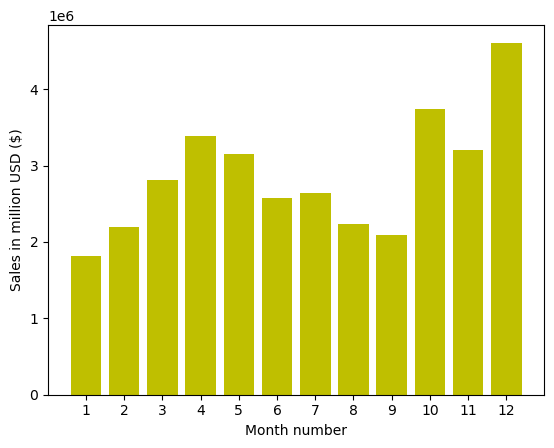

In [77]:
x = range(1,13)
sales = df1.groupby('Month')[['sale']].sum()
plt.bar(x,sales['sale'],color = 'y')
plt.xticks(x)
plt.ylabel('Sales in million USD ($)')
plt.xlabel('Month number')
plt.show()

### Question 2: What city sold the most product?

In [43]:
df1.groupby('City')[['Order_ID']].count().sort_values(by='Order_ID',ascending = False).rename(columns = {'Order_ID': 'Total_Product'})

,Total_Product
City,
San Francisco,44662
Los Angeles,29564
New York City,24847
Boston,19901
Atlanta,14863
Dallas,14797
Seattle,14713
Portland,12449
Austin,9890


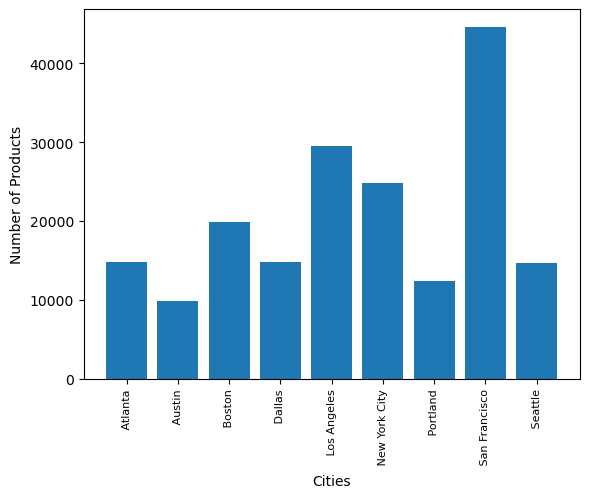

In [53]:
results2 = df1.groupby('City')[['Order_ID']].count().rename(columns = {'Order_ID': 'Total_Product'})
cities = results2.index
plt.bar(cities,results2['Total_Product'])
plt.xticks(cities,rotation='vertical',size=8)
plt.ylabel('Number of Products')
plt.xlabel('Cities')
plt.show()

### Question 3: What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [48]:
df1.groupby('Order_Time')[['Order_ID']].count().sort_values(by='Order_ID',ascending= True).rename(columns = {'Order_ID': 'Total_Product'})

,Total_Product
Order_Time,
3,830
4,852
2,1242
5,1320
1,2347
6,2481
0,3902
7,4002
8,6252


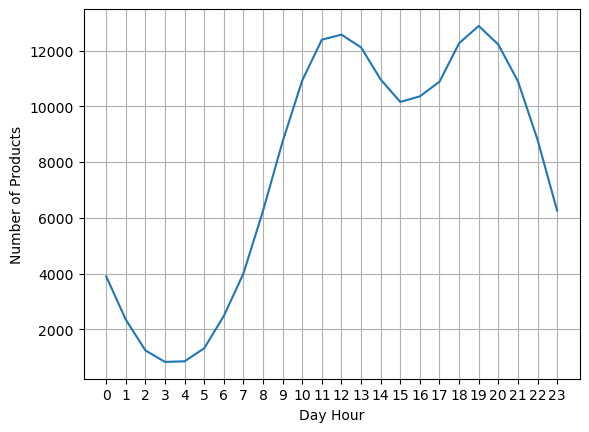

In [54]:
order = df1.groupby('Order_Time')[['Order_ID']].count().rename(columns = {'Order_ID': 'Total_Product'})
x = order.index
plt.plot(x,order['Total_Product'])
plt.xticks(x)
plt.ylabel('Number of Products')
plt.xlabel('Day Hour')
plt.grid()
plt.show()

### Question 4: What products are most often sold together?

In [145]:
df1['Order_ID'].nunique()

178437

In [167]:
temp_df1 = df1[df1['Order_ID'].duplicated(keep = False)]

In [183]:
temp_df1['grouped'] = temp_df1.groupby('Order_ID')['Product'].transform(lambda x: ','.join(x))

C:\Users\user\AppData\Local\Temp\ipykernel_15180\230249907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df1['grouped'] = temp_df1.groupby('Order_ID')['Product'].transform(lambda x: ','.join(x))


In [184]:
df2 = temp_df1.drop_duplicates(subset=['Order_ID','grouped'])

In [186]:
df2.groupby('grouped')['Product'].count().reset_index().sort_values(by='Product',ascending = False).rename(columns={'Product':'sold'})

,grouped,sold
329,"iPhone,Lightning Charging Cable",886
165,"Google Phone,USB-C Charging Cable",857
348,"iPhone,Wired Headphones",361
286,"Vareebadd Phone,USB-C Charging Cable",312
180,"Google Phone,Wired Headphones",303
...,...,...
182,"Google Phone,Wired Headphones,Macbook Pro Laptop",1
183,"Google Phone,Wired Headphones,USB-C Charging C...",1
284,"Vareebadd Phone,Lightning Charging Cable",1
185,"LG Dryer,27in 4K Gaming Monitor",1


### Question 5: What product sold the most? 

In [194]:
df1.groupby('Product')['sale'].sum().reset_index().sort_values(by='sale',ascending = False)

,Product,sale
13,Macbook Pro Laptop,8032500.00
18,iPhone,4792900.00
14,ThinkPad Laptop,4127958.72
9,Google Phone,3317400.00
1,27in 4K Gaming Monitor,2433147.61
3,34in Ultrawide Monitor,2352898.08
6,Apple Airpods Headphones,2345550.00
8,Flatscreen TV,1443900.00
7,Bose SoundSport Headphones,1342865.70
2,27in FHD Monitor,1131074.59


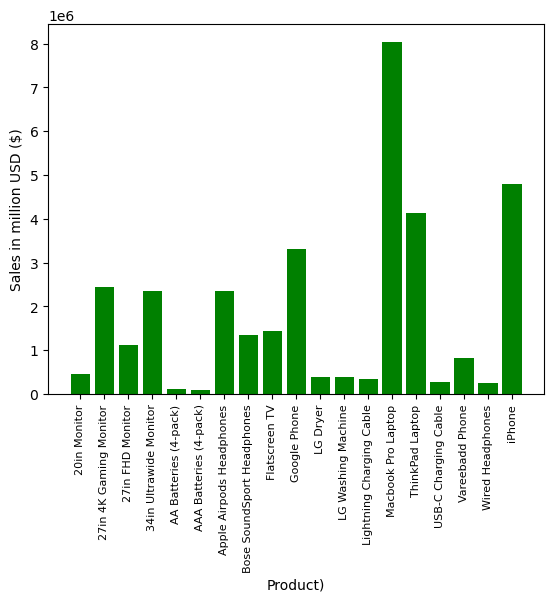

In [75]:
results3 = df1.groupby('Product')['sale'].sum().reset_index()
Products = results3['Product']
plt.bar(Products,results3['sale'],color = 'g')
plt.ylabel('Sales in million USD ($)')
plt.xlabel('Product)')
plt.xticks(Products,rotation='vertical',size=8)
plt.show()

### Question 6: What are the total profits and total sales per quarter?

In [83]:
df1['quarter'] = df1['Month'].apply(lambda x: 'Q1' if x in [1,2,3] else 'Q2' if x in [4,5,6] else 'Q3' if x in [7,8,9] else 'Q4')

In [91]:
quarter_data = df1.groupby('quarter')[['sale']].sum().reset_index().sort_values(by='sale',ascending = False)
total_sales = df1['sale'].sum()

In [96]:
quarter_data['percentage'] = round((quarter_data['sale'] / total_sales) * 100 , 2)

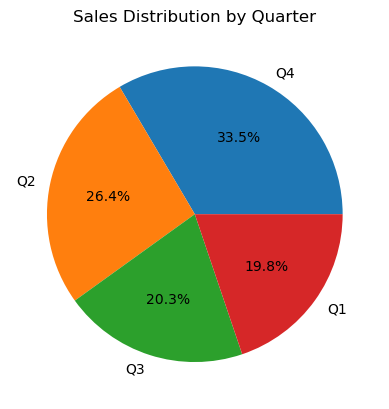

In [103]:
x = quarter_data['quarter']
y = quarter_data['sale'] 
plt.pie(y, labels=x, autopct='%1.1f%%')
plt.title('Sales Distribution by Quarter')
plt.show()